# Case Study on ANOVA


XYZ Company has offices in four different zones. The company wishes to
investigate the following :                                             
● The mean sales generated by each zone.                              
● Total sales generated by all the zones for each month.                                      
● Check whether all the zones generate the same amount of sales.                                
Help the company to carry out their study with the help of data provided.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Sales_data_zone_wise.csv')
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [3]:
df.shape

(29, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [5]:
df.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


<AxesSubplot:>

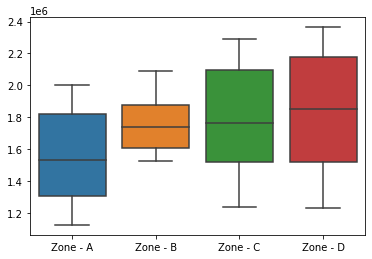

In [6]:
sns.boxplot(data=df)

## ● The mean sales generated by each zone.

In [7]:
#individual zone mean
df1=df[['Zone - A','Zone - B','Zone - C','Zone - D']].mean()
df1

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

<AxesSubplot:>

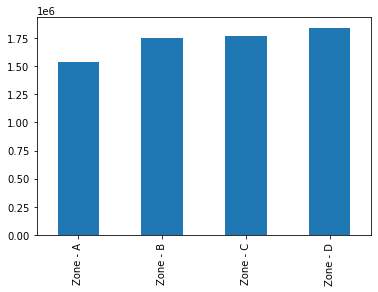

In [8]:
df1.plot(kind='bar')

It can be seen that Mean for zone-D is higher in comparing all the other three.
For zone B and C there is only slight difference in mean.

In [9]:
#grand mean
df1.mean()

1727962.6293103448

## ● Total sales generated by all the zones for each month.

In [10]:
df['Total_Sales']=df['Zone - A']+df['Zone - B']+df['Zone - C']+df['Zone - D']
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total_Sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328


## ● Check whether all the zones generate the same amount of sales.

### using F-Test

In [11]:
#set the hypothesis
#Null hypothesis,H0: All the zones generate same amount of sales
#Alternate Hypothesis,Ha: Atleast one zone generate different amount of sales   

In [12]:
# Importing library
from scipy.stats import f_oneway

In [13]:
#perform one way anova
f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'])

F_onewayResult(statistic=5.672056106843581, pvalue=0.0011827601694503335)

The p value obtained from ANOVA analysis is 0.0011827601694503335 (p < 0.05), and therefore we reject null hypothesis.
Thus we conclude that there is significant difference in sales